In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category = UserWarning)
import visuals as vs

In [2]:
# songs_data

song_df = pd.read_excel('songs.xlsx')
song_df.head()

,Unnamed: 0,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favoriteCount,commentCount,duration,definition,caption
0,0,F44TK5EHCRo,T-Series,RAFTA RAFTA (Lo-Fi Mix) | Dj Moody | KK | Jeet...,"Presenting the song ""RAFTA RAFTA (Lo-Fi Mix)"" ...","['hindi songs 2023', 'hindi songs new', 'bolly...",2023-08-20T12:30:08Z,7299,241,0,59,PT4M42S,hd,False
1,1,adx8Rsjp-c0,T-Series,"TUM HO MERA PYAR (Lo-Fi Mix) | Dj Moody | KK, ...","Presenting the song ""TUM HO MERA PYAR (Lo-Fi M...","['hindi songs 2023', 'hindi songs new', 'bolly...",2023-08-20T10:30:01Z,4212,144,0,32,PT5M27S,hd,False
2,2,36nQLyrR7Sw,T-Series,ISHQ HOTHON SE (Lo-Fi Mix) (Audio) | Dj Moody ...,"Presenting the song ""ISHQ HOTHON SE (Lo-Fi Mix...","['hindi songs 2023', 'hindi songs new', 'bolly...",2023-08-20T09:30:00Z,2849,79,0,31,PT6M10S,hd,False
3,3,TKbifi5AMQo,T-Series,HUMKO PYAR HUA (Lo-Fi Mix) (Audio) | Dj Moody ...,"Presenting the song ""HUMKO PYAR HUA (Lo-Fi Mix...","['hindi songs 2023', 'hindi songs new', 'bolly...",2023-08-20T07:30:05Z,3991,116,0,36,PT5M59S,hd,False
4,4,NNA21SoGqss,T-Series,Har Har Mahadev (Lyrical Video): Sachet Tandon...,"T-Series Presents ""Har Har Mahadev (Lyrical Vi...","['hindi songs 2023', 'hindi songs new', 'bolly...",2023-08-20T05:30:06Z,101950,6230,0,434,PT3M37S,hd,False


In [3]:
# Check data info
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19345 entries, 0 to 19344
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     19345 non-null  int64 
 1   video_id       19345 non-null  object
 2   channelTitle   19345 non-null  object
 3   title          19345 non-null  object
 4   description    19342 non-null  object
 5   tags           19345 non-null  object
 6   publishedAt    19345 non-null  object
 7   viewCount      19345 non-null  int64 
 8   likeCount      19345 non-null  int64 
 9   favoriteCount  19345 non-null  int64 
 10  commentCount   19345 non-null  int64 
 11  duration       19345 non-null  object
 12  definition     19345 non-null  object
 13  caption        19345 non-null  bool  
dtypes: bool(1), int64(5), object(8)
memory usage: 1.9+ MB


In [4]:
# Check number of unique attributes in each variable
song_df.nunique()

Unnamed: 0       19345
video_id         19345
channelTitle         1
title            19220
description      18359
tags             14620
publishedAt      19181
viewCount        19131
likeCount        11932
favoriteCount        1
commentCount      4493
duration          1448
definition           2
caption              2
dtype: int64

### DATA PREPROCESSING

1. drop Unnamed: 0 column
2. convert publishAt to datetime
3. channelTitle and favoriteCount are useless because they have just 1 unique value, hence should be dropped
4. Change publishedAt from object to datetime 

In [5]:
# make a copy of song_df
clean_song_df = song_df.copy()
clean_song_df.head()

,Unnamed: 0,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favoriteCount,commentCount,duration,definition,caption
0,0,F44TK5EHCRo,T-Series,RAFTA RAFTA (Lo-Fi Mix) | Dj Moody | KK | Jeet...,"Presenting the song ""RAFTA RAFTA (Lo-Fi Mix)"" ...","['hindi songs 2023', 'hindi songs new', 'bolly...",2023-08-20T12:30:08Z,7299,241,0,59,PT4M42S,hd,False
1,1,adx8Rsjp-c0,T-Series,"TUM HO MERA PYAR (Lo-Fi Mix) | Dj Moody | KK, ...","Presenting the song ""TUM HO MERA PYAR (Lo-Fi M...","['hindi songs 2023', 'hindi songs new', 'bolly...",2023-08-20T10:30:01Z,4212,144,0,32,PT5M27S,hd,False
2,2,36nQLyrR7Sw,T-Series,ISHQ HOTHON SE (Lo-Fi Mix) (Audio) | Dj Moody ...,"Presenting the song ""ISHQ HOTHON SE (Lo-Fi Mix...","['hindi songs 2023', 'hindi songs new', 'bolly...",2023-08-20T09:30:00Z,2849,79,0,31,PT6M10S,hd,False
3,3,TKbifi5AMQo,T-Series,HUMKO PYAR HUA (Lo-Fi Mix) (Audio) | Dj Moody ...,"Presenting the song ""HUMKO PYAR HUA (Lo-Fi Mix...","['hindi songs 2023', 'hindi songs new', 'bolly...",2023-08-20T07:30:05Z,3991,116,0,36,PT5M59S,hd,False
4,4,NNA21SoGqss,T-Series,Har Har Mahadev (Lyrical Video): Sachet Tandon...,"T-Series Presents ""Har Har Mahadev (Lyrical Vi...","['hindi songs 2023', 'hindi songs new', 'bolly...",2023-08-20T05:30:06Z,101950,6230,0,434,PT3M37S,hd,False


In [6]:
# drop unwanted columns

clean_song_df.drop(['Unnamed: 0',
                    'video_id',
                    'description',
                    'favoriteCount',
                    'channelTitle'], axis= 'columns', inplace=True)
clean_song_df.head(2)

,title,tags,publishedAt,viewCount,likeCount,commentCount,duration,definition,caption
0,RAFTA RAFTA (Lo-Fi Mix) | Dj Moody | KK | Jeet...,"['hindi songs 2023', 'hindi songs new', 'bolly...",2023-08-20T12:30:08Z,7299,241,59,PT4M42S,hd,False
1,"TUM HO MERA PYAR (Lo-Fi Mix) | Dj Moody | KK, ...","['hindi songs 2023', 'hindi songs new', 'bolly...",2023-08-20T10:30:01Z,4212,144,32,PT5M27S,hd,False


In [7]:
# Convert dtype from object to datetime
clean_song_df.publishedAt = pd.to_datetime(clean_song_df.publishedAt)

clean_song_df.head(3)

,title,tags,publishedAt,viewCount,likeCount,commentCount,duration,definition,caption
0,RAFTA RAFTA (Lo-Fi Mix) | Dj Moody | KK | Jeet...,"['hindi songs 2023', 'hindi songs new', 'bolly...",2023-08-20 12:30:08+00:00,7299,241,59,PT4M42S,hd,False
1,"TUM HO MERA PYAR (Lo-Fi Mix) | Dj Moody | KK, ...","['hindi songs 2023', 'hindi songs new', 'bolly...",2023-08-20 10:30:01+00:00,4212,144,32,PT5M27S,hd,False
2,ISHQ HOTHON SE (Lo-Fi Mix) (Audio) | Dj Moody ...,"['hindi songs 2023', 'hindi songs new', 'bolly...",2023-08-20 09:30:00+00:00,2849,79,31,PT6M10S,hd,False


In [8]:
# Check data info
clean_song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19345 entries, 0 to 19344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   title         19345 non-null  object             
 1   tags          19345 non-null  object             
 2   publishedAt   19345 non-null  datetime64[ns, UTC]
 3   viewCount     19345 non-null  int64              
 4   likeCount     19345 non-null  int64              
 5   commentCount  19345 non-null  int64              
 6   duration      19345 non-null  object             
 7   definition    19345 non-null  object             
 8   caption       19345 non-null  bool               
dtypes: bool(1), datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 1.2+ MB


###  Exploratory Data Analysis (EDA)

- Explore patterns and distributions in view counts, like counts, and comments.    
- Identify trends in the popularity and engagement of YouTube song videos. 

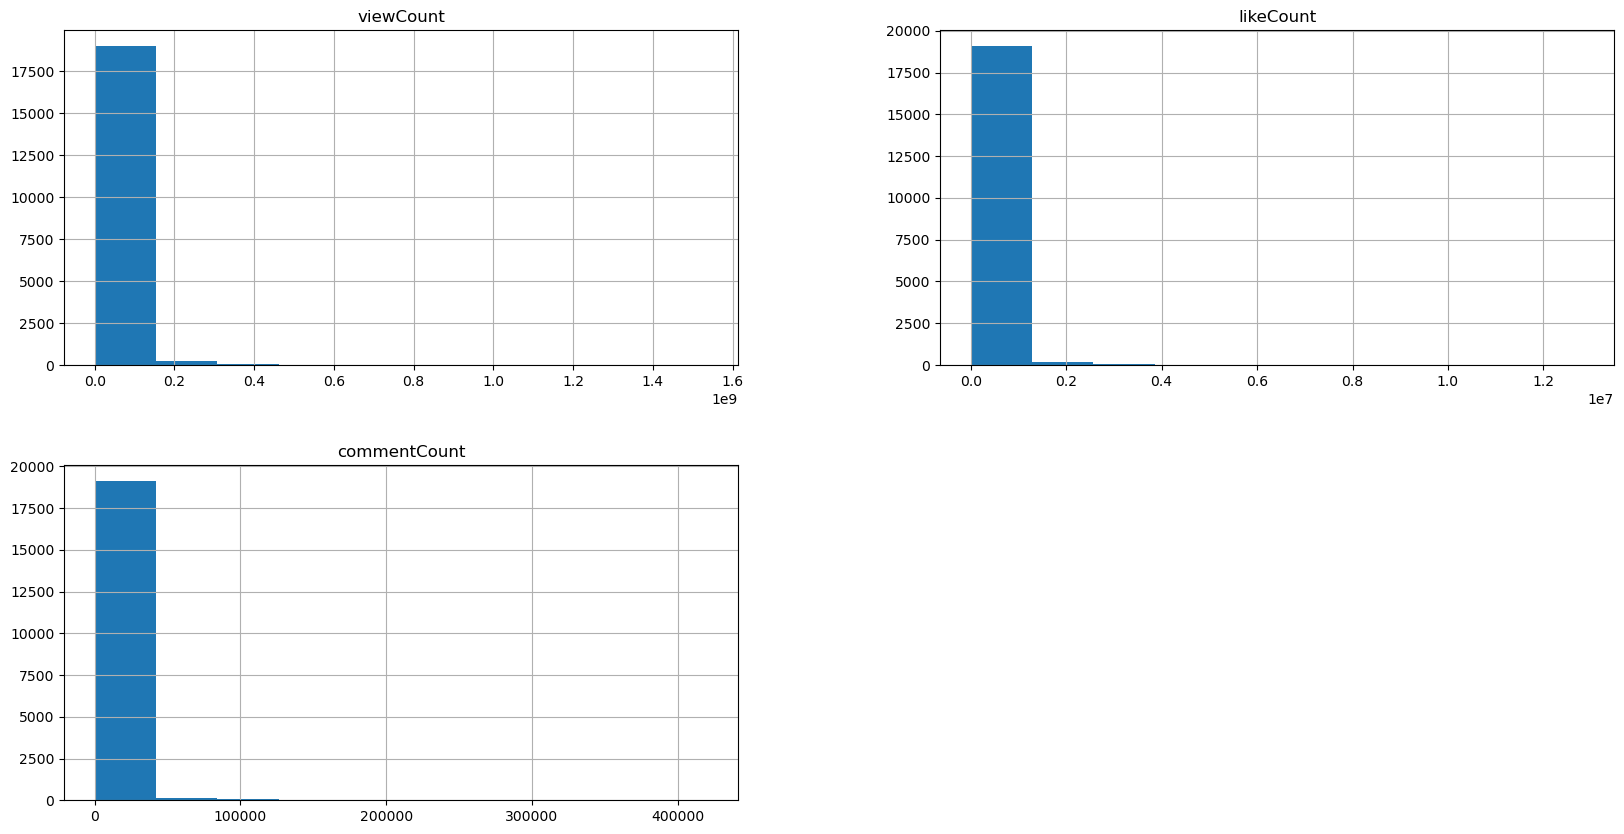

In [9]:
# EDA

clean_song_df.hist(['viewCount', 'likeCount', 'commentCount'], figsize=(20, 10));

### EDA Observation:

- __Data points are skewed in each metric column__
- __Out of 19345 observations:__

1. _About 19000 observations have viewCount between 0 and 200 million_
2. _About 19000 observations have likeCount between 0 and 6 million_
3. _About 19000 observations have commentCount between 0 and 50k_

In [10]:
# Describe data
clean_song_df.describe()

,viewCount,likeCount,commentCount
count,1.934500e+04,1.934500e+04,19345.000000
mean,1.193826e+07,8.718149e+04,2636.024141
std,5.484973e+07,3.610099e+05,12487.178242
min,0.000000e+00,0.000000e+00,0.000000
25%,8.044200e+04,6.440000e+02,37.000000
50%,3.627810e+05,3.929000e+03,184.000000
75%,2.613386e+06,2.580300e+04,961.000000
max,1.536719e+09,1.284022e+07,420375.000000


### Description observation:

__1. On Average, viewCount is over 1m, likeCount is about 90k, and commentCount is about 2600__

__2. Median viewCount is about 360k, about 4k for likeCount, and 184 for commentCount__

__3. Minimum video metrics is 0, maximum values are: 1.5b for viewCount, about 13m for likeCount, and 420k for commentCount__

__Summary:__ _mean and median values are too far away suggesting there's a problem with the metrics data. Also, maximum values are too far away from the centre which suggest outliers._

In [11]:
# Rows with zero viewCounts
clean_song_df[clean_song_df.viewCount == clean_song_df.viewCount.min()]

,title,tags,publishedAt,viewCount,likeCount,commentCount,duration,definition,caption
8183,Millind Gaba,"['latest hindi songs', 'bollywood', 'songs', '...",2018-01-10 09:50:44+00:00,0,208,0,P0D,sd,False
8184,Millind Gaba Live With Us,"['latest hindi songs', 'bollywood', 'songs', '...",2018-01-10 09:40:55+00:00,0,121,0,P0D,sd,False
9413,LIVE: Hindi Medium Trailer Launch at Twitter B...,[],2017-04-06 09:09:22+00:00,0,27,0,P0D,sd,False
9414,LIVE: Hindi Medium Trailer Launch at Twitter B...,[],2017-04-06 08:56:16+00:00,0,17,0,P0D,sd,False
9471,LIVE: Gulaabi 2.0 Song Launch | Noor,[],2017-03-22 13:53:02+00:00,0,41,0,P0D,sd,False
9473,LIVE: Gulaabi 2.0 Song Launch | Noor,[],2017-03-22 12:53:41+00:00,0,73,0,P0D,sd,False
9488,Naam Shabana,[],2017-03-19 05:57:42+00:00,0,31,0,P0D,sd,False
9492,LIVE: Siddharth Slathia | TSeries Acoustics So...,[],2017-03-16 13:31:26+00:00,0,66,0,P0D,sd,False


No views and comments but likes.
Also notice, for [] tags
1. duration is : P0D (live video with no duration yet). 
2. efinition is: sd.
3. caption is: False

__Summary: These rows are not valid and no value can be inputted due to lack of domain knowledge.__

In [12]:
# Rows with duration = P0D
clean_song_df[clean_song_df.duration == 'P0D']

,title,tags,publishedAt,viewCount,likeCount,commentCount,duration,definition,caption
8183,Millind Gaba,"['latest hindi songs', 'bollywood', 'songs', '...",2018-01-10 09:50:44+00:00,0,208,0,P0D,sd,False
8184,Millind Gaba Live With Us,"['latest hindi songs', 'bollywood', 'songs', '...",2018-01-10 09:40:55+00:00,0,121,0,P0D,sd,False
9413,LIVE: Hindi Medium Trailer Launch at Twitter B...,[],2017-04-06 09:09:22+00:00,0,27,0,P0D,sd,False
9414,LIVE: Hindi Medium Trailer Launch at Twitter B...,[],2017-04-06 08:56:16+00:00,0,17,0,P0D,sd,False
9471,LIVE: Gulaabi 2.0 Song Launch | Noor,[],2017-03-22 13:53:02+00:00,0,41,0,P0D,sd,False
9473,LIVE: Gulaabi 2.0 Song Launch | Noor,[],2017-03-22 12:53:41+00:00,0,73,0,P0D,sd,False
9488,Naam Shabana,[],2017-03-19 05:57:42+00:00,0,31,0,P0D,sd,False
9492,LIVE: Siddharth Slathia | TSeries Acoustics So...,[],2017-03-16 13:31:26+00:00,0,66,0,P0D,sd,False
9549,Cheez Badi Launch Event | Machine,[],2017-03-06 06:42:12+00:00,2,55,0,P0D,sd,False


In [13]:
# Rows with tag = []
clean_song_df[clean_song_df.tags == '[]']

,title,tags,publishedAt,viewCount,likeCount,commentCount,duration,definition,caption
69,Vishal Mishra vibing on #dilonkidoriyan #bawaa...,[],2023-08-06 08:34:46+00:00,149293,7567,55,PT22S,hd,False
108,You Talking To Me? #gururandhawa | Trip Beats ...,[],2023-07-29 06:07:31+00:00,235006,13245,106,PT16S,hd,False
990,"Chunari Mein Daag (Teaser) Tony Kakkar, Yohani...",[],2023-03-06 07:30:09+00:00,344223,14252,126,PT24S,hd,False
1006,Chal Dikha Zara Jo Tera Dance Move Hai #showme...,[],2023-03-02 13:30:05+00:00,1703561,84089,237,PT33S,hd,False
1009,"Subah Ko (Teaser) Raghav Chaitanya, Aarushi Ga...",[],2023-03-02 07:30:04+00:00,99165,3720,23,PT17S,hd,False
1010,"'SRI' ANNOUNCEMENT! Rajkummar Rao, Alaya F | T...",[],2023-03-02 06:36:43+00:00,117505,4490,32,PT23S,hd,False
1013,#showmethethumka Can you move like #Makkar??? 💃💃🕺,[],2023-03-01 13:30:02+00:00,3628324,128879,303,PT40S,hd,False
1016,Chal Dikha Zara Jo Tera Dance Move Hai #showm...,[],2023-02-28 13:30:20+00:00,20650044,698138,2007,PT40S,hd,False
1023,"Already Watched This 100 Times, WBU? #biba #gi...",[],2023-02-27 14:30:08+00:00,285443,7057,54,PT27S,hd,False
1035,Vaarun admiring #biba | Create your own #Short...,[],2023-02-23 14:30:03+00:00,73434,2546,52,PT58S,hd,False


__Videos with [] tags are short videos with no caption. Maximum video duration in this category is 2 minutes__

In [14]:
clean_song_df[clean_song_df.caption == True]

,title,tags,publishedAt,viewCount,likeCount,commentCount,duration,definition,caption
39,Jawan: Chaleya (Hindi) | Shah Rukh Khan | Naya...,"['hindi songs 2023', 'hindi songs new', 'bolly...",2023-08-14 06:19:10+00:00,39243770,903789,50019,PT3M8S,hd,True
48,"YAARIYAN 2 (TEASER): Divya,Yash,Meezaan,Anaswa...","['hindi songs 2023', 'hindi songs new', 'bolly...",2023-08-10 08:00:06+00:00,20575342,98367,18558,PT2M22S,hd,True
95,Jawan: Zinda Banda Song |Shah Rukh Khan |Atlee...,"['hindi songs 2023', 'hindi songs new', 'bolly...",2023-07-31 07:19:08+00:00,59238514,1058020,79310,PT3M46S,hd,True
205,Hi Papa Glimpse | Nani | Mrunal Thakur | Shour...,"['hindi songs 2023', 'hindi songs new', 'bolly...",2023-07-13 13:08:54+00:00,2291682,49297,961,PT1M16S,hd,True
207,DHUNIYA (Video) ABHYUHAM | Ajmal Amir | Rahul ...,"['hindi songs 2023', 'hindi songs new', 'bolly...",2023-07-13 11:08:43+00:00,1062149,6638,737,PT2M45S,hd,True
...,...,...,...,...,...,...,...,...,...
13668,Tera Rastaa Chennai Express Full Video Song HD...,"['tera rasta chennai express', 'tera rasta che...",2013-10-08 06:58:58+00:00,1349737,10027,214,PT2M23S,hd,True
13689,Titli Chennai Express Full Video Song | Shahru...,"['titli chennai express', 'titli full song', '...",2013-09-30 09:42:26+00:00,77381604,598635,9917,PT3M54S,hd,True
13864,"Sawaar Loon Lootera Full Song | Ranveer Singh,...","['tseries offical channel', 'lootera soundtrac...",2013-07-19 11:42:33+00:00,2153004,20891,352,PT3M18S,hd,True
13943,Balam Pichkari Full Song Video Yeh Jawaani Hai...,"['\\balam pichkari song\\', '\\balam pichkari ...",2013-06-22 13:00:04+00:00,343759522,1845363,30666,PT4M20S,hd,True


In [15]:
clean_song_df.to_csv('clean_song_df.csv', index=False)

## Data Visualisation

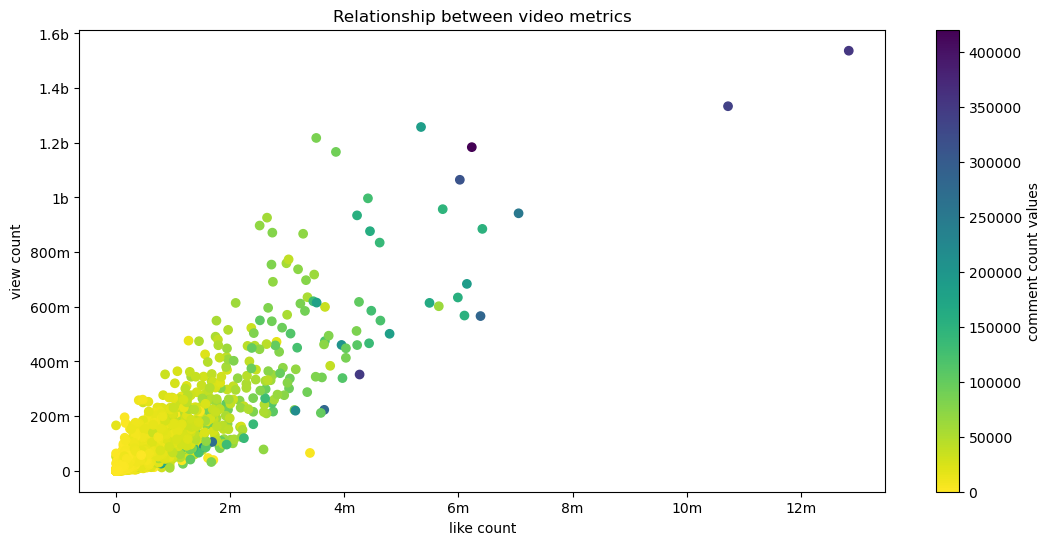

In [16]:
# Relationship between video metrics
vs.metrics_relationship_scatter_plot()

The multivariate scatter plot above is between likecount vs viewcount. comment count is the third variable that acts as colour encoder.

- Most likecount points are between 0 and around 3 million
- Most viewcount points hover between 0 to 400 million
- Most commentcount points are between 0 and 500 thousand

There is a positive correlation between video metrics

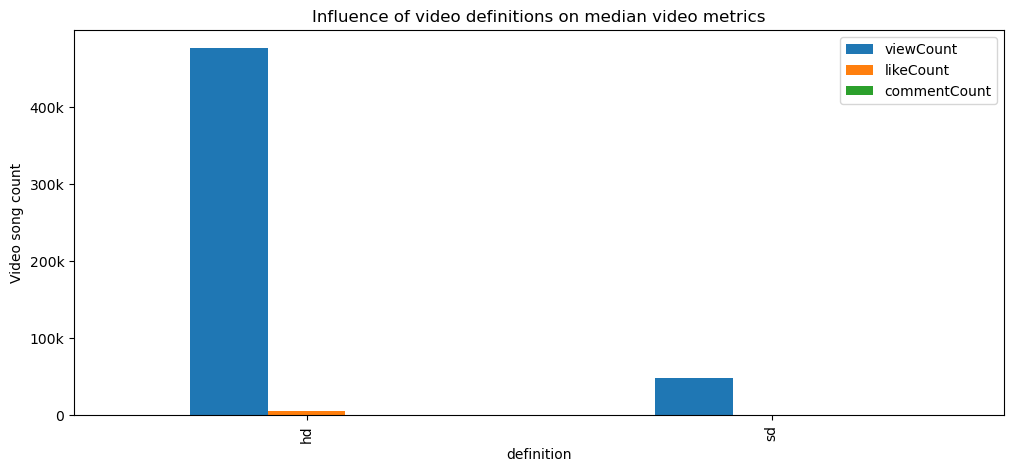

In [17]:
# Influence of definition on median engagement metrics
vs.definition_bar_plot()

Two types of definition are present: hd, and sd

From the clustered barchart, based on median, it is obvious that hd videos have higher metrics score than sd videos.

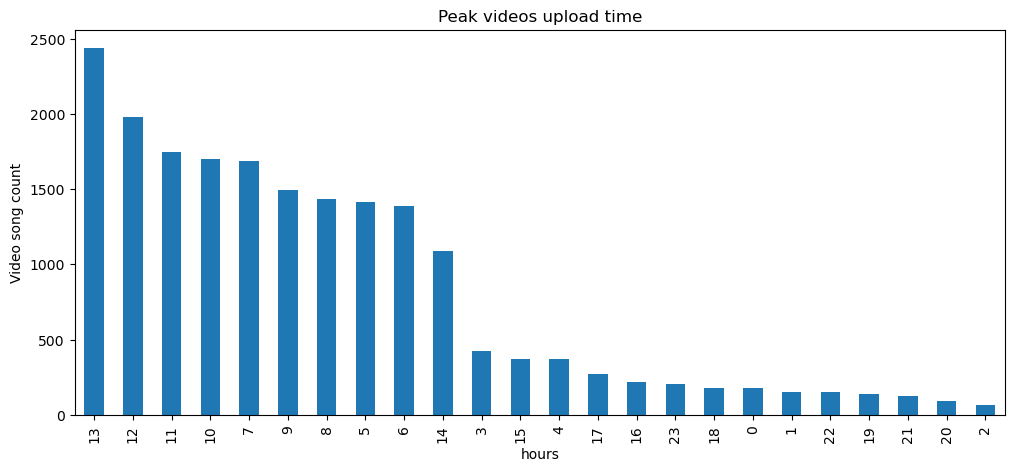

In [18]:
# Peak video upload/publishing times
vs.video_published_time_by_count_plot()

In this dataset, most videos (about 2500) are uploaded around 1pm 

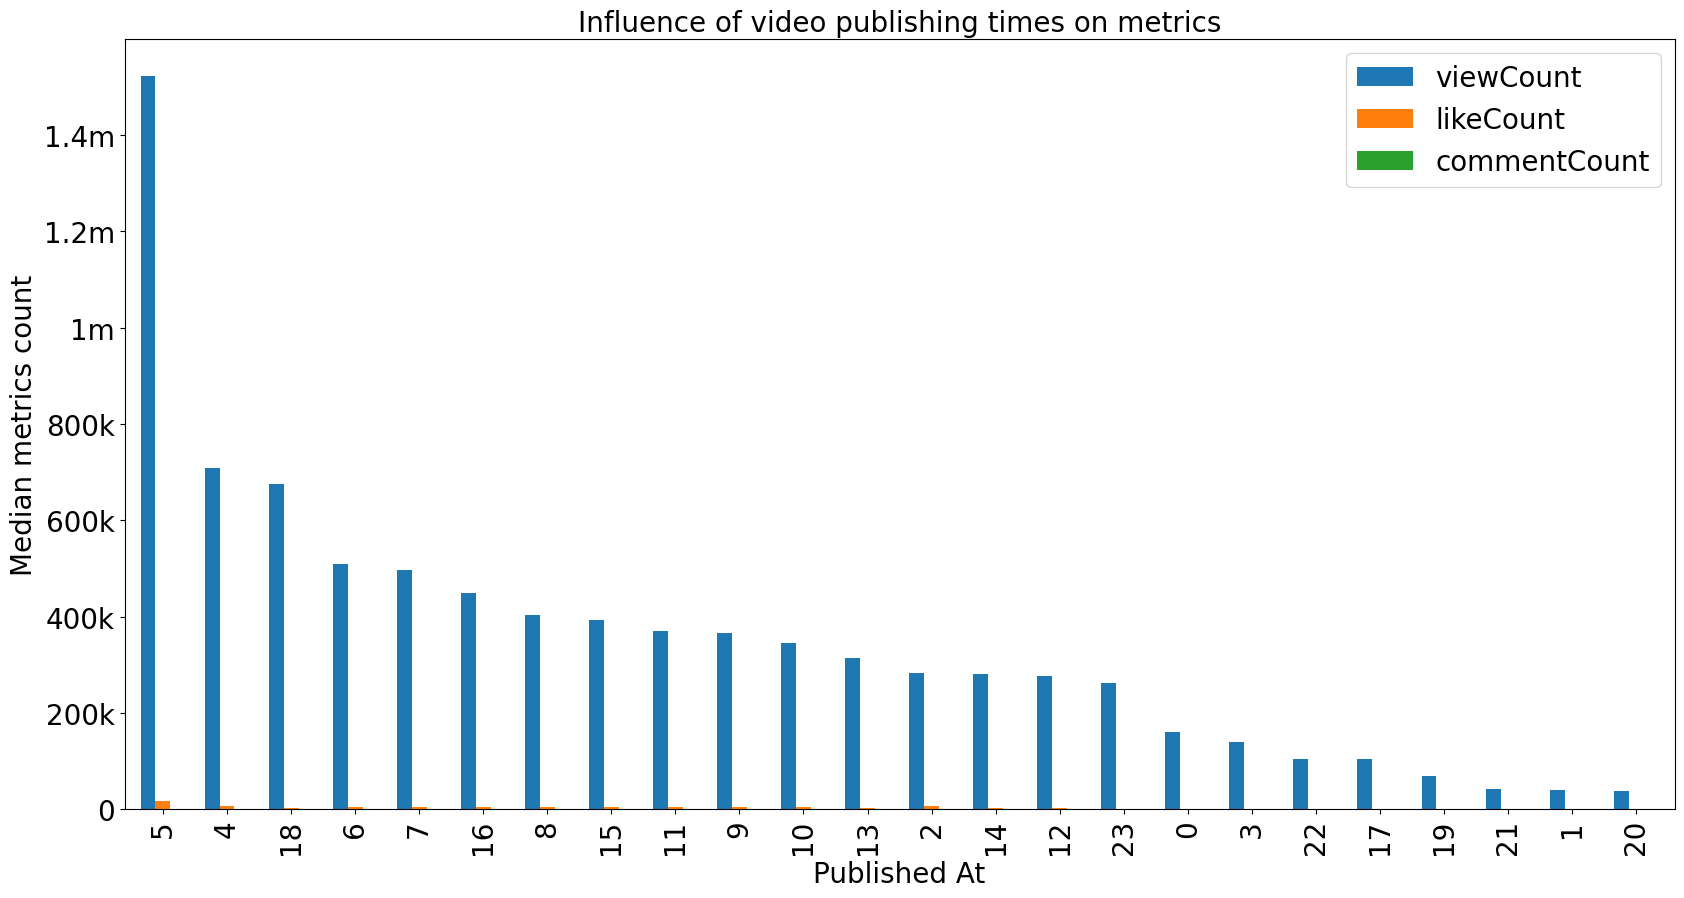

In [19]:
# Peak video publishing times and influence on median metrics
vs.video_publishing_time_by_median_metrics_plot()

Based on median, videos uploaded at 5am have the highest video matrics of around 1.5 million.

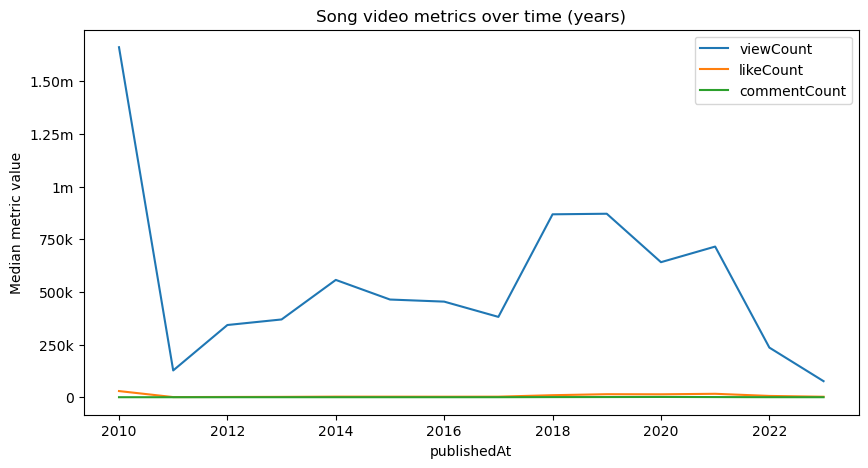

In [20]:
# Songs metrics performance over years
vs.songs_over_time_plot()

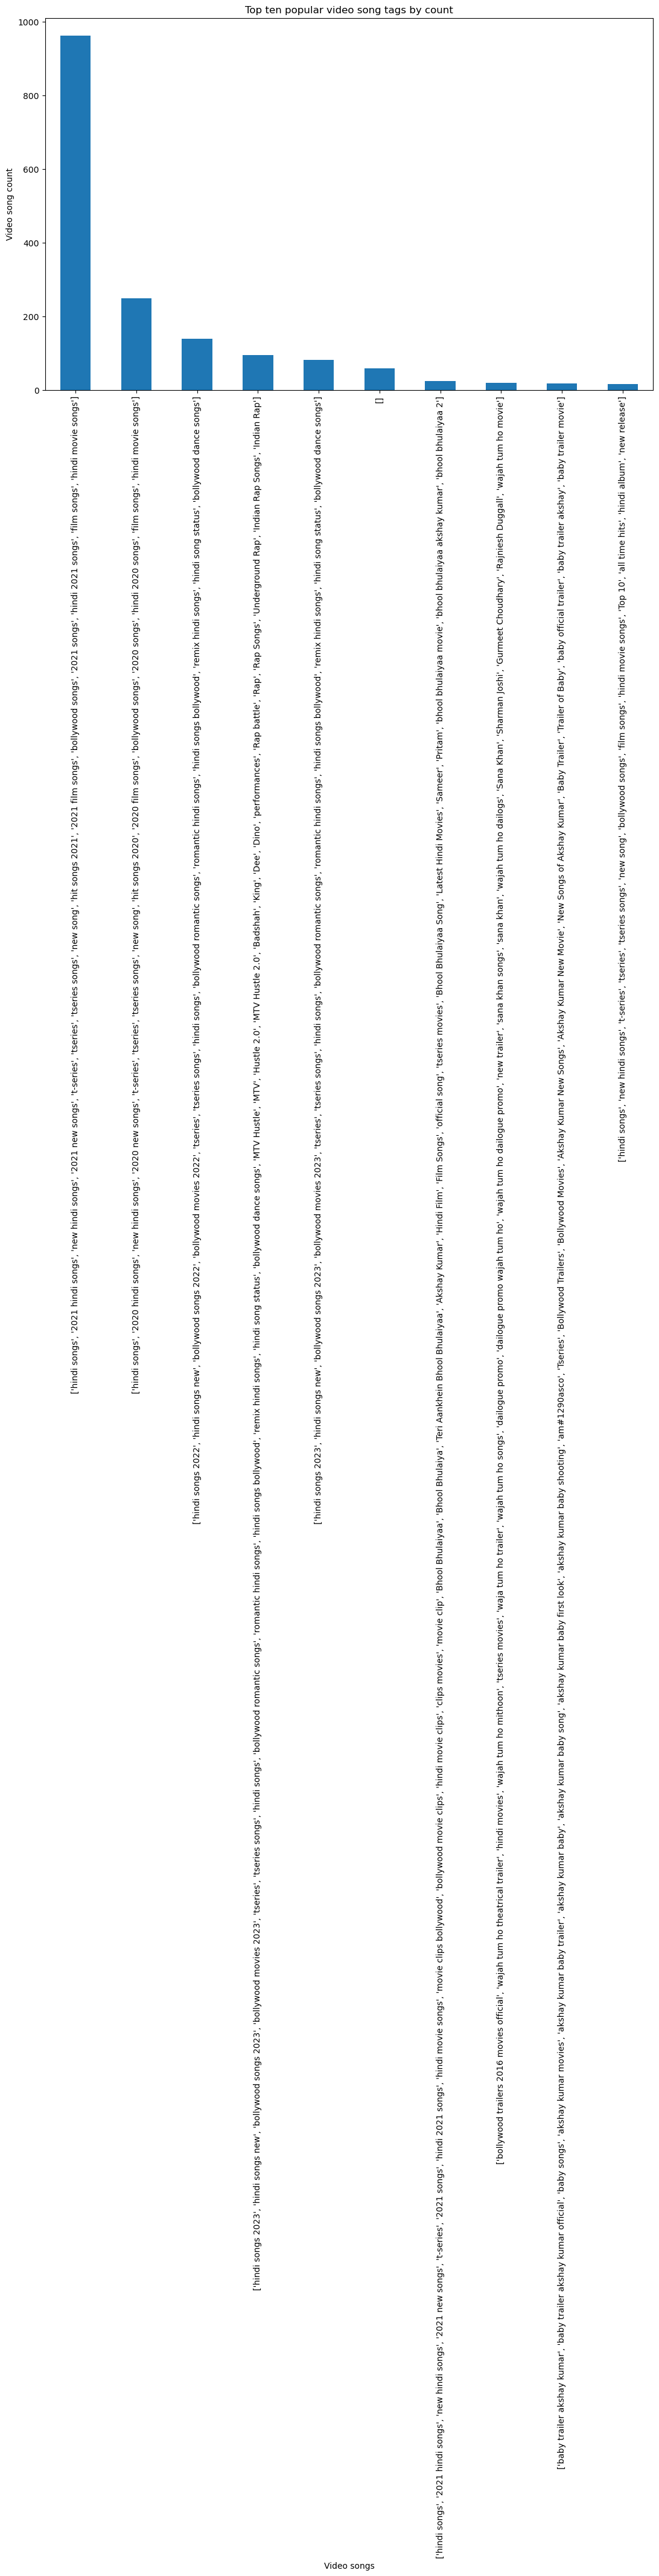

In [21]:
# Top 10 popular video tags by count
vs.top_ten_video_tags_count_plot()

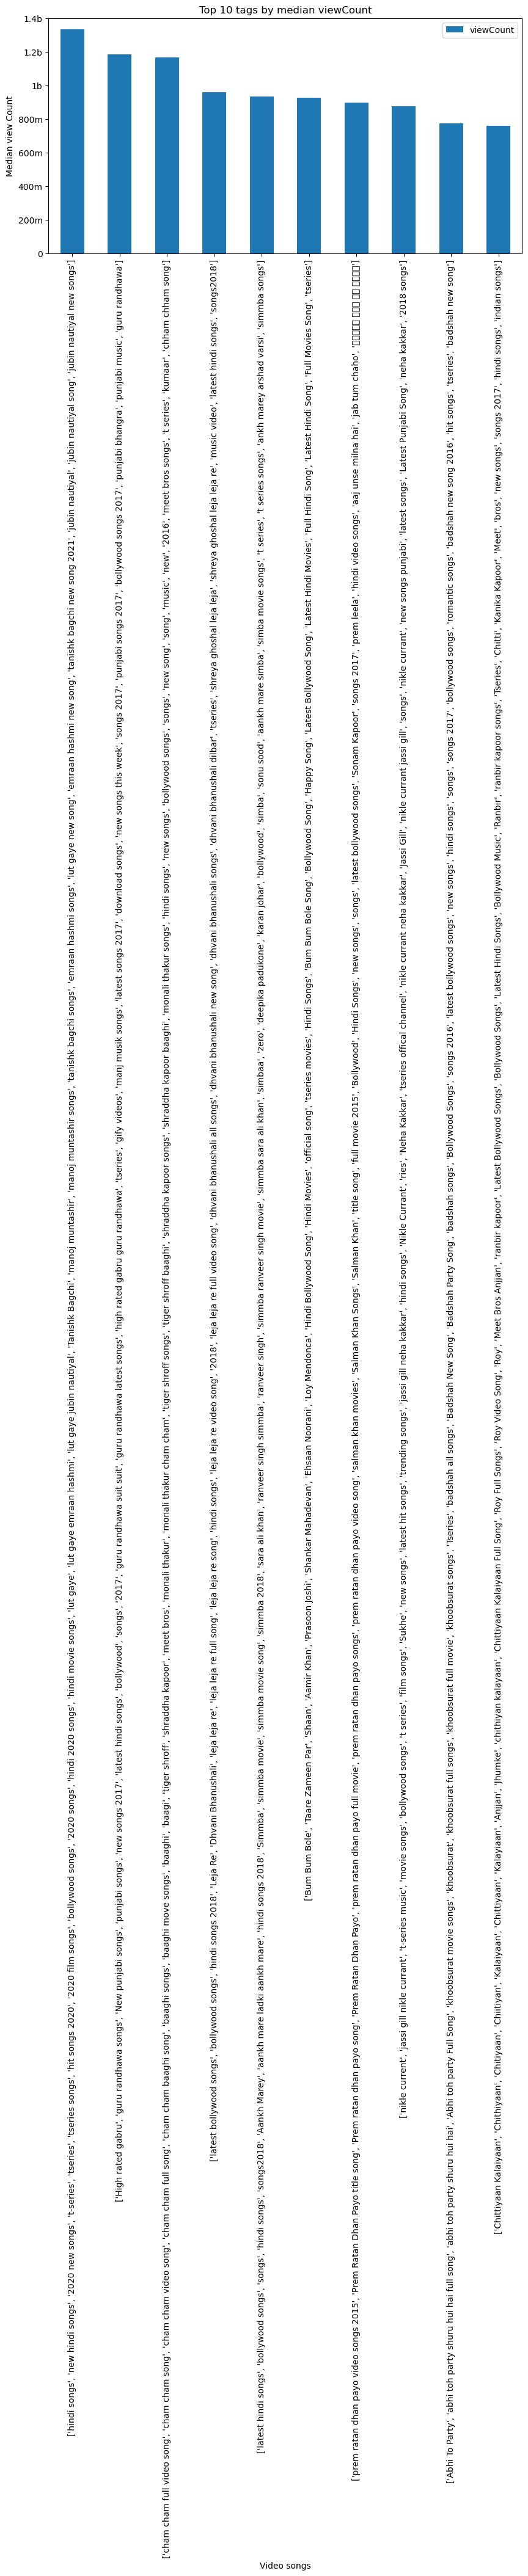

In [22]:
# Top 10 tags by median viewCount
vs.top_ten_video_tags_median()

### Summary

- On median, tags with '2020 new songs' have the highest view count(just over 1.3 billion)
- There is a strong positive relationship between video metrics
- On median, videos in T-series channel witnessed the highest view count  engagement in 2018(close to 1m) and the worst in 2023(about 80k). This may happen due to many factors like uninteresting contents or the year is not complete. No doubt, 2010 had about 1.6 million view counts, but there was only one video in that year.
- Based on median, videos uploaded at 5am have the highest video matrics of around 1.5 million.
- Based on median, high definition(hd) videos have higher metrics score than standard definition (sd) videos.
- Based on median still, videos uploaded at 4am, 5am, 7am, and 6pm drive more metrics engagement 

### Recommendations 

For content creators and stakeholders at T-series channel:

1. Publish your videos around 4am, 5am, 7am, and 6pm for better engagement 
2. Make sure your video definition is hd
3. Review metrics of most engaged videos from previous years, check the video contents to know better what the channel subscribers are interested in. 